### 📈 Project Title: *Enhancing Momentum Strategies with Skewness – A Quantitative Deep Dive*

> *By Ali Sarabandi*  
> *MSc Student @ University of Bicocca - Milano*

<p align="center">
  <img src="https://www.disat.unimib.it/sites/st12/files/mmffcmyk.png" alt="Bird Classifier" width="200">
</p>

---
This notebook will be the same strategy that I have done on sp500, but this time is it going to be on Stoxx600. For the sake of simplicity I separated them from each other in order to prevent the variable conflict. For the comparison of both stock markets go back to the last chunk in the file "1.S&P500".

In [1]:
import pandas as pd

# Load the file and inspect sheet names
file_path = '/Users/alesarabandi/Downloads/Fin_Market/Stoxx 600 Originale.xlsm'
xls = pd.ExcelFile(file_path)

# Show all sheet names to find where the price data is
print("Sheet names:")
print(xls.sheet_names)

# Try loading the first sheet to preview structure (adjust index if needed)
sample_sheet = xls.sheet_names[0]
df_sample = pd.read_excel(xls, sheet_name=sample_sheet)

# Display the top rows of the sample sheet
print(f"\nPreview of sheet '{sample_sheet}':")
print(df_sample.head())


Sheet names:
['Scarico', 'Servizio', 'AC', 'Price', 'Price daily', 'Peso', 'Sector', 'Sectorf', 'Energy', 'Communications', 'Consumer, Non-cyclical', 'Industrial', 'Financial', 'Consumer, Cyclical', 'Technology', 'Utilities', 'Basic Materials', 'Diversified']

Preview of sheet 'Scarico':
       Unnamed: 0           Unnamed: 1 Unnamed: 2    Unnamed: 3  \
0          Ticker                 Nome       Peso          Azni   
1   BP/ LN Equity               BP PLC      3.754  22375.777893   
2   VOD LN Equity   Vodafone Group PLC   3.033265   68140.84752   
3   GSK LN Equity  GlaxoSmithKline PLC   2.749009   6057.066528   
4  HSBA LN Equity    HSBC Holdings PLC   2.566902       9449.71   

  2002-12-31 00:00:00      Unnamed: 5           Unnamed: 6 Unnamed: 7  \
0                 Prz          Ticker                 Nome       Peso   
1              6.4946   BP/ LN Equity               BP PLC   3.613053   
2              1.7232   VOD LN Equity   Vodafone Group PLC   3.139546   
3              1

In [2]:
# Load the 'Price daily' sheet
df_prices = pd.read_excel(xls, sheet_name='Price daily')

# Display the shape and first few rows
print("Shape of price data:", df_prices.shape)
print("\nPreview of 'Price daily':")
print(df_prices.head())


Shape of price data: (4415, 1256)

Preview of 'Price daily':
            Unnamed: 0 BP/ LN Equity       VOD LN Equity        GSK LN Equity  \
0                Dates        BP PLC  Vodafone Group PLC  GlaxoSmithKline PLC   
1  2002-01-01 00:00:00       8.72226             4.18054             28.14317   
2  2002-01-02 00:00:00       8.48942             4.02933             27.33882   
3  2002-01-03 00:00:00        8.5631             4.18204             28.10616   
4  2002-01-04 00:00:00       8.59106             4.22866             27.72348   

      HSBA LN Equity FP FP Equity NOVN SW Equity             RDA NA Equity  \
0  HSBC Holdings PLC     TOTAL SA    Novartis AG  Royal Dutch Petroleum Co   
1           11.47251      39.5749       40.52545                      56.9   
2             11.299      38.8841       39.68591                      54.4   
3           11.59081      39.3282        38.9271                      54.9   
4           11.78465      39.4022       38.62622              

In [3]:
# Reload with header set to row 1 (i.e. skip metadata row)
df_prices = pd.read_excel(xls, sheet_name='Price daily', header=1)

# Rename first column to 'Date' and convert to datetime
df_prices.rename(columns={df_prices.columns[0]: 'Date'}, inplace=True)
df_prices['Date'] = pd.to_datetime(df_prices['Date'])

# Set date as index
df_prices.set_index('Date', inplace=True)

# Convert all values to numeric (coerce errors)
df_prices = df_prices.apply(pd.to_numeric, errors='coerce')

# Drop any columns that are fully NaN
df_prices.dropna(axis=1, how='all', inplace=True)

# Display a sample
print("Cleaned price data shape:", df_prices.shape)
print(df_prices.head())


Cleaned price data shape: (4414, 1255)
             BP PLC  Vodafone Group PLC  GlaxoSmithKline PLC  \
Date                                                           
2002-01-01  8.72226             4.18054             28.14317   
2002-01-02  8.48942             4.02933             27.33882   
2002-01-03  8.56310             4.18204             28.10616   
2002-01-04  8.59106             4.22866             27.72348   
2002-01-07  8.55836             4.16140             27.40609   

            HSBC Holdings PLC  TOTAL SA  Novartis AG  \
Date                                                   
2002-01-01           11.47251   39.5749     40.52545   
2002-01-02           11.29900   38.8841     39.68591   
2002-01-03           11.59081   39.3282     38.92710   
2002-01-04           11.78465   39.4022     38.62622   
2002-01-07           11.66068   38.9087     38.80380   

            Royal Dutch Petroleum Co  Nestle SA  Nokia OYJ  \
Date                                                     

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a binary mask: 1 where data is present, 0 where it's NaN
binary_mask = df_prices.notna().astype(int)
binary_mask

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,1,0,1,0
2002-01-02,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,1,0,1,0
2002-01-03,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,1,0,1,0
2002-01-04,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,1,0,1,0
2002-01-07,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2018-11-27,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2018-11-28,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
# Calculate how many valid data points each stock has
data_coverage = df_prices.notna().sum()

# Turn it into a nice summary table
summary_table = pd.DataFrame({
    'Ticker': data_coverage.index,
    'Available Days': data_coverage.values
}).sort_values(by='Available Days', ascending=False)

print("Top 10 stocks with longest price histories:")
print(summary_table.head(10))

print("\nBottom 10 stocks with shortest price histories:")
print(summary_table.tail(10))


Top 10 stocks with longest price histories:
                                 Ticker  Available Days
0                                BP PLC            4414
611                        MS Amlin PLC            4414
1251                         Bechtle AG            4414
614                        Actelion Ltd            4414
615                Public Power Corp SA            4414
616   Tullett Prebon Group Holdings PLC            4414
617                   Orange Belgium SA            4414
618                Banco de Valencia SA            4414
620                           Mapfre SA            4414
621                  BillerudKorsnas AB            4414

Bottom 10 stocks with shortest price histories:
                       Ticker  Available Days
1213         Delivery Hero SE             371
1169                 METRO AG             362
1207               Linde AG.1             333
1210        Pirelli & C SpA.1             304
1226  Siemens Healthineers AG             186
1235           

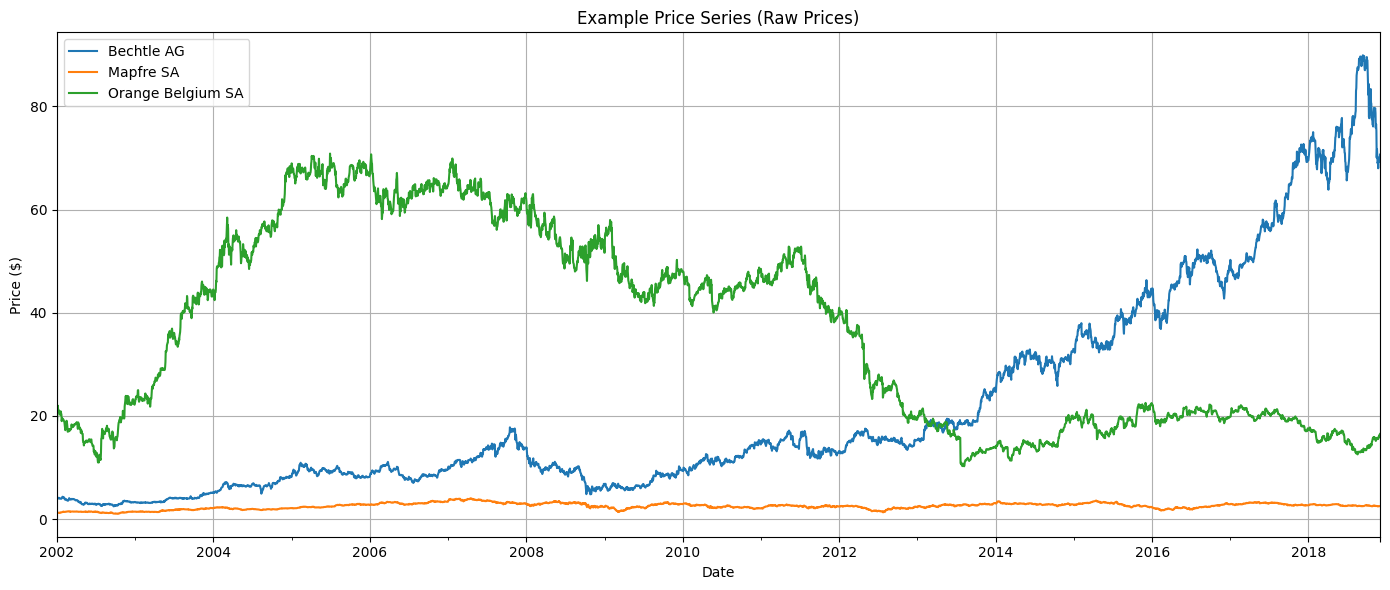

In [14]:
example_tickers = ['Bechtle AG', 'Mapfre SA', 'Orange Belgium SA']
df_prices[example_tickers].plot(figsize=(14, 6))
plt.title("Example Price Series (Raw Prices)")
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import numpy as np

# Compute log returns
df_returns = np.log(df_prices / df_prices.shift(1))


# Show shape and preview
print("Log returns shape:", df_returns.shape)
df_returns.head()


Log returns shape: (4414, 1255)


,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02,-0.027058,-0.036840,-0.028997,-0.015240,-0.017610,-0.020934,-0.044931,-0.008096,-0.039083,-0.017195,...,-0.007897,NaN,NaN,0.000000,NaN,NaN,-0.010916,NaN,0.052794,NaN
2002-01-03,0.008642,0.037199,0.027681,0.025498,0.011356,-0.019306,0.009149,0.000412,0.055861,0.015795,...,0.000000,NaN,NaN,0.000000,NaN,NaN,0.004866,NaN,0.027630,NaN
2002-01-04,0.003260,0.011086,-0.013709,0.016585,0.001880,-0.007759,-0.001823,-0.000160,-0.002380,0.000749,...,0.000000,NaN,NaN,0.024513,NaN,NaN,-0.035828,NaN,0.000000,NaN
2002-01-07,-0.003814,-0.016034,-0.011514,-0.010575,-0.012604,0.004587,-0.006407,0.000859,-0.016473,-0.006238,...,-0.003422,NaN,NaN,-0.001795,NaN,NaN,0.017457,NaN,0.000000,NaN


In [16]:
import numpy as np

# Compute log returns
df_returns = np.log(df_prices / df_prices.shift(1))

# Drop the first row which will be NaN due to shifting
df_returns_with_drop = df_returns.dropna()

# Show shape and preview
print("Log returns shape:", df_returns_with_drop.shape)
df_returns_with_drop.head()


Log returns shape: (24, 1255)


,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-30,0.016119,-0.005353,0.000311,0.000863,-0.004719,0.007294,0.0,0.009913,0.000204,0.0,...,-0.023960,0.003087,0.001025,-0.006159,-0.002702,-0.001064,-0.005242,0.014706,0.012632,-0.007176
2018-10-31,0.045442,0.012327,-0.010145,0.019813,0.023760,0.013709,0.0,0.008770,0.017553,0.0,...,0.005514,0.009092,0.029763,0.024413,0.023696,0.003679,0.031050,0.019278,0.042136,-0.006537
2018-11-01,-0.036454,0.034678,0.010752,0.000587,-0.025732,-0.002066,0.0,-0.001856,0.005982,0.0,...,0.000000,-0.002966,0.008907,-0.026180,-0.011623,0.010791,0.007614,0.036325,0.025461,-0.015655
2018-11-02,-0.016115,-0.007343,-0.022379,0.010508,-0.007731,-0.005595,0.0,-0.013864,0.016171,0.0,...,0.031914,-0.000546,0.022407,0.023592,-0.029564,-0.007874,0.007557,-0.004036,0.013594,-0.036783
2018-11-05,0.019701,0.002535,0.021547,-0.004903,0.022628,0.006453,0.0,0.003991,0.002735,0.0,...,0.029010,-0.009499,-0.017493,-0.042334,-0.000025,-0.004445,-0.020280,0.011488,0.011235,0.016953


In [17]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# Make sure 'Date' is index
returns = df_returns.copy()
returns.index = pd.to_datetime(returns.index)
returns = returns.sort_index()

# 1. Resample monthly (take last value of each month)
monthly_returns = returns.resample('M').sum()

# 2. Initialize momentum and skewness DataFrames
momentum_df = pd.DataFrame(index=monthly_returns.index, columns=monthly_returns.columns)
skewness_df = pd.DataFrame(index=monthly_returns.index, columns=monthly_returns.columns)

# 3. Compute rolling metrics: 12 months, excluding last one (i.e., lag=1)
for i in range(12, len(monthly_returns)):
    window_returns = monthly_returns.iloc[i-12:i-1]  # exclude last month
    momentum_df.iloc[i] = window_returns.sum()
    skewness_df.iloc[i] = window_returns.apply(lambda x: skew(x.dropna()), axis=0)

# Drop initial rows with NaNs
momentum_df = momentum_df.dropna(how='all')
skewness_df = skewness_df.dropna(how='all')

print(f"Momentum shape: {momentum_df.shape}")
print(f"Skewness shape: {skewness_df.shape}")
display(momentum_df.head())
display(skewness_df.head())
display(momentum_df.tail())
display(skewness_df.tail())


/var/folders/gm/6dd1_bfn3754c2866shkmkgc0000gn/T/ipykernel_8450/2832910053.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = returns.resample('M').sum()


Momentum shape: (191, 1255)
Skewness shape: (191, 1255)


,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-31,-0.2865,-0.430327,-0.40203,-0.098263,-0.171656,-0.080094,-0.256197,-0.162227,-0.400643,-0.166675,...,0.716642,0.0,0.0,-1.134163,0.0,0.0,-0.184979,0.0,-1.580139,0.0
2003-02-28,-0.318904,-0.365337,-0.417916,-0.21363,-0.179748,-0.135953,-0.313566,-0.221377,-0.567786,-0.230524,...,0.861626,0.0,0.0,-1.161625,0.0,0.0,-0.249812,0.0,-1.636852,0.0
2003-03-31,-0.484479,-0.267197,-0.472687,-0.264897,-0.302109,-0.253935,-0.436019,-0.277369,-0.630442,-0.350253,...,0.947599,0.0,0.0,-0.846841,0.0,0.0,-0.190044,0.0,-1.546706,0.0
2003-04-30,-0.559882,-0.245201,-0.507042,-0.285137,-0.367223,-0.27971,-0.53502,-0.310584,-0.669895,-0.465773,...,0.716158,0.0,0.0,-0.899761,0.0,0.0,-0.138049,0.0,-1.796191,0.0
2003-05-31,-0.48779,-0.089797,-0.509666,-0.33151,-0.371566,-0.31642,-0.45488,-0.369585,-0.3497,-0.354519,...,0.716964,0.0,0.0,-0.868937,0.0,0.0,0.135666,0.0,-1.609572,0.0


,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-31,-0.285905,0.489558,-1.797267,-0.568231,-0.477743,1.094851,-0.907721,-0.495254,0.168406,-0.260796,...,0.063257,NaN,NaN,-0.927085,NaN,NaN,-0.19227,NaN,-0.379391,NaN
2003-02-28,-0.239617,0.454166,-1.763861,-0.323225,-0.458819,0.892389,-0.723303,-0.761718,0.194884,-0.031345,...,-0.119366,NaN,NaN,-0.902735,NaN,NaN,-0.040133,NaN,-0.30261,NaN
2003-03-31,0.034454,0.336567,-1.791329,-0.169103,-0.150358,0.147231,-0.424036,-0.521301,0.276362,0.28037,...,-0.149044,NaN,NaN,-1.357923,NaN,NaN,-0.172692,NaN,-0.39935,NaN
2003-04-30,-0.623238,0.293047,-1.580619,-0.163075,-0.164925,0.033848,-0.363068,-0.328887,0.346955,0.562081,...,0.088631,NaN,NaN,-1.335421,NaN,NaN,-0.305886,NaN,-0.391689,NaN
2003-05-31,-0.90134,0.15624,-1.586235,-0.003689,-0.141141,-0.69798,-0.575146,-0.553761,0.364529,0.188231,...,0.087589,NaN,NaN,-1.333958,NaN,NaN,0.004295,NaN,-0.582803,NaN


,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-31,0.262828,-0.127468,-0.071291,0.011747,0.184399,-0.138311,0.0,-0.163759,-0.080665,0.0,...,0.257944,0.196567,-0.077596,0.465007,0.128052,0.024981,0.292338,0.205593,0.068039,0.0
2018-08-31,0.271935,-0.177007,0.021765,-0.051399,0.195005,-0.104899,0.0,-0.075076,-0.087349,0.0,...,0.165536,0.26999,0.070204,0.450905,0.144537,0.05163,0.082757,0.283257,0.18879,0.0
2018-09-30,0.285832,-0.141393,0.063717,0.005823,0.251353,0.014944,0.0,-0.021592,-0.113613,0.0,...,0.023091,0.299759,0.108181,0.619027,0.185139,0.096538,0.280973,0.237406,0.095958,0.0
2018-10-31,0.121541,-0.253778,0.031862,-0.112401,0.170071,-0.013915,0.0,0.020401,-0.057112,0.0,...,0.120869,0.282251,0.127424,0.720825,0.242274,0.042664,0.346765,0.217695,0.093544,0.0
2018-11-30,0.129499,-0.285148,0.109424,-0.106572,0.154001,0.049814,0.0,-0.001701,0.124926,0.0,...,-0.003709,0.255728,0.143021,0.497293,0.210745,-0.013278,0.245256,0.148464,0.01788,0.0


,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-31,0.125385,-0.208564,-0.376371,0.160659,1.479499,0.169715,NaN,-0.900922,0.585182,NaN,...,0.770927,-0.050328,0.045359,-0.911522,-0.309224,-1.002883,-0.505436,-1.24518,-0.510727,NaN
2018-08-31,0.099446,0.010316,-0.460977,0.502417,1.47368,-0.000185,NaN,-0.976354,0.604826,NaN,...,0.554028,-0.421907,-0.122683,-0.832855,-0.2637,-1.09097,-0.504437,-0.464384,-0.697566,NaN
2018-09-30,0.082196,-0.154937,-0.69189,0.212174,1.034596,0.84118,NaN,-0.346495,0.649713,NaN,...,-0.186048,-0.60845,-0.153746,-0.826462,-0.182193,-1.118352,-0.491782,-0.360082,-0.954282,NaN
2018-10-31,0.33588,-0.101143,-0.498569,0.120044,1.162274,1.051464,NaN,-0.446237,0.488759,NaN,...,-0.458206,-0.480696,-0.182539,-0.371145,-0.521449,-0.90321,-0.310769,-0.296995,-0.961479,NaN
2018-11-30,0.331335,-0.042062,-0.166201,0.087754,1.293432,0.666959,NaN,-0.284375,1.319457,NaN,...,-0.095562,-0.815587,-0.25767,-0.45656,-0.439306,-0.681439,-0.023666,-0.076694,-0.841157,NaN


In [18]:
import pandas as pd
import numpy as np

# Empty DataFrame to store strategy returns
strategy_returns = pd.DataFrame(index=monthly_returns.index[12:])  # match momentum/skewness length

# Loop over months to build portfolios
for date in strategy_returns.index:
    # Get momentum and skewness values for current month
    momentums = momentum_df.loc[date]
    skews = skewness_df.loc[date]

    # Drop NaNs
    valid_data = pd.concat([momentums, skews], axis=1).dropna()
    valid_data.columns = ['momentum', 'skew']

    # Step 1: Select top 20 by momentum
    top_20 = valid_data.sort_values('momentum', ascending=False).head(20)

    # Step 2: Drop bottom 30% by skewness (i.e., bottom 6 out of 20)
    cutoff = int(len(top_20) * 0.3)
    top_skew_filtered = top_20.sort_values('skew', ascending=False).iloc[:-cutoff]

    # Step 3: Get next month's return for these stocks
    try:
        next_month = monthly_returns.index[monthly_returns.index.get_loc(date) + 1]
        returns_next_month = monthly_returns.loc[next_month, top_skew_filtered.index]

        # Step 4: Equal-weight portfolio return
        portfolio_return = returns_next_month.mean()
        strategy_returns.loc[date, 'strategy'] = portfolio_return
    except IndexError:
        # Last month; no next month returns available
        continue


In [19]:
benchmark_returns = monthly_returns.mean(axis=1).loc[strategy_returns.index]
strategy_returns['benchmark'] = benchmark_returns
strategy_returns

,strategy,benchmark
Date,,
2003-01-31,-0.032094,-0.043842
2003-02-28,-0.034365,-0.043666
2003-03-31,0.053577,-0.018757
2003-04-30,0.069535,0.085183
2003-05-31,0.033584,0.026697
...,...,...
2018-07-31,-0.057576,0.014708
2018-08-31,-0.008325,-0.013008
2018-09-30,-0.124850,-0.008889


In [20]:
def performance_stats(returns, periods_per_year=12):
    """
    Calculate basic performance metrics for monthly returns.
    """
    # Drop NaNs just in case
    returns = returns.dropna()
    
    # Cumulative returns
    cumulative = (1 + returns).cumprod()
    
    # Total number of years
    total_years = len(returns) / periods_per_year
    
    # CAGR
    cagr = cumulative.iloc[-1] ** (1 / total_years) - 1
    
    # Annualized volatility
    vol = returns.std() * np.sqrt(periods_per_year)
    
    # Sharpe ratio (assumes risk-free rate = 0)
    sharpe = cagr / vol if vol != 0 else np.nan
    
    # Max Drawdown
    roll_max = cumulative.cummax()
    drawdown = (cumulative - roll_max) / roll_max
    max_dd = drawdown.min()
    
    return {
        'CAGR': cagr,
        'Volatility': vol,
        'Sharpe Ratio': sharpe,
        'Max Drawdown': max_dd
    }

# Calculate stats for strategy and benchmark
strategy_stats = performance_stats(strategy_returns['strategy'])
benchmark_stats = performance_stats(strategy_returns['benchmark'])

print("Strategy Performance:")
for k, v in strategy_stats.items():
    print(f"{k}: {v:.2%}")

print("\nBenchmark Performance:")
for k, v in benchmark_stats.items():
    print(f"{k}: {v:.2%}")


Strategy Performance:
CAGR: 8.88%
Volatility: 23.40%
Sharpe Ratio: 37.98%
Max Drawdown: -65.28%

Benchmark Performance:
CAGR: 1.94%
Volatility: 12.64%
Sharpe Ratio: 15.37%
Max Drawdown: -57.85%


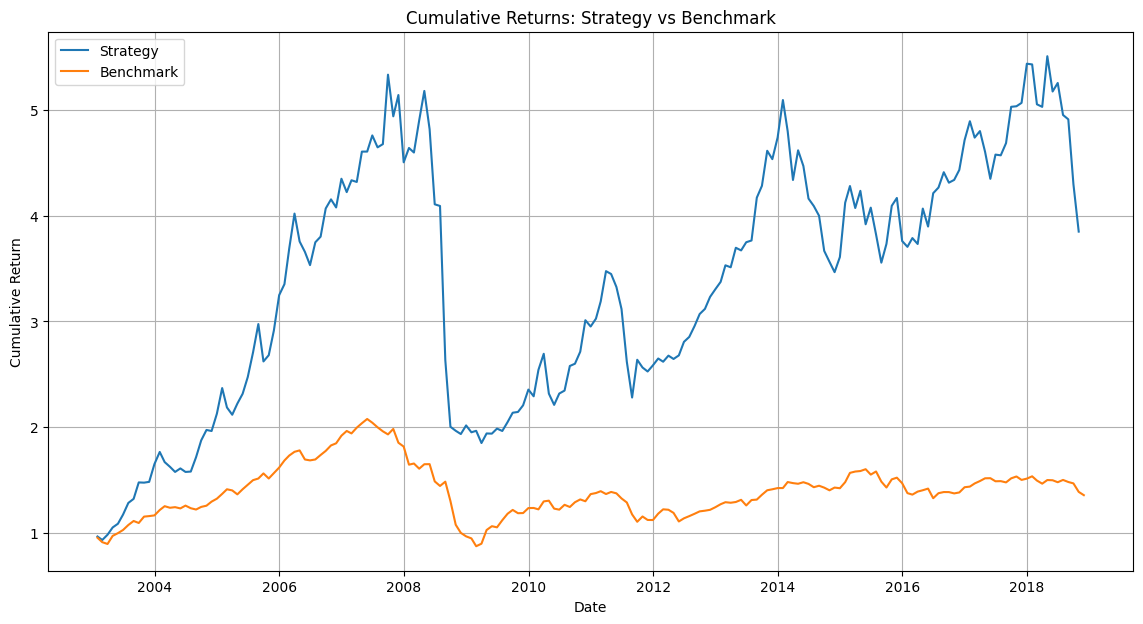

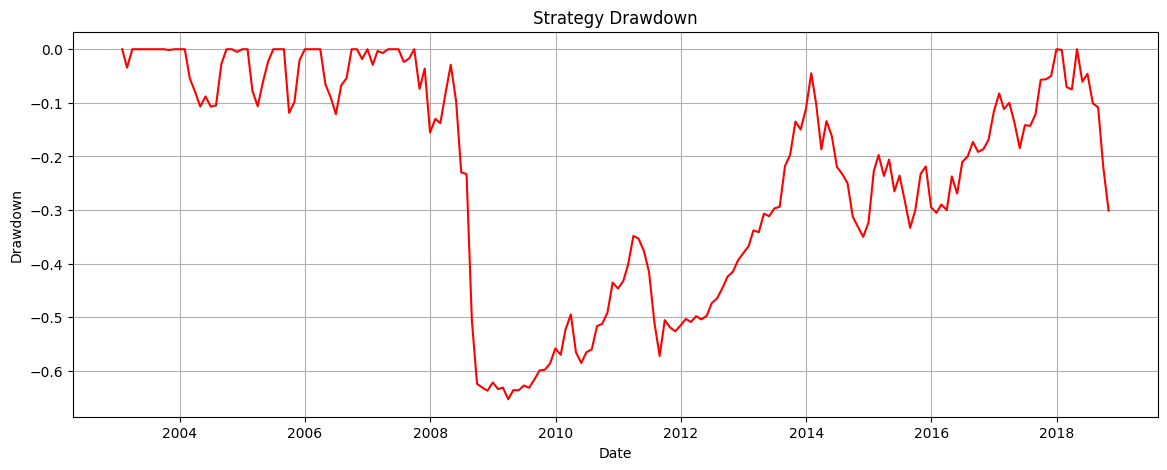

In [21]:
import matplotlib.pyplot as plt

# Calculate cumulative returns
strategy_cum = (1 + strategy_returns['strategy']).cumprod()
benchmark_cum = (1 + strategy_returns['benchmark']).cumprod()

plt.figure(figsize=(14,7))
plt.plot(strategy_cum, label='Strategy')
plt.plot(benchmark_cum, label='Benchmark')
plt.title('Cumulative Returns: Strategy vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Drawdown plot
plt.figure(figsize=(14,5))
drawdown_strategy = (strategy_cum / strategy_cum.cummax()) - 1
plt.plot(drawdown_strategy, color='red')
plt.title('Strategy Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()



--- Performance with Final Portfolio Size = 30 ---
Strategy Performance:
CAGR: 10.50%
Volatility: 18.82%
Sharpe Ratio: 55.79%
Max Drawdown: -58.33%

Benchmark Performance (same as before):
CAGR: 1.94%
Volatility: 12.64%
Sharpe Ratio: 15.37%
Max Drawdown: -57.85%


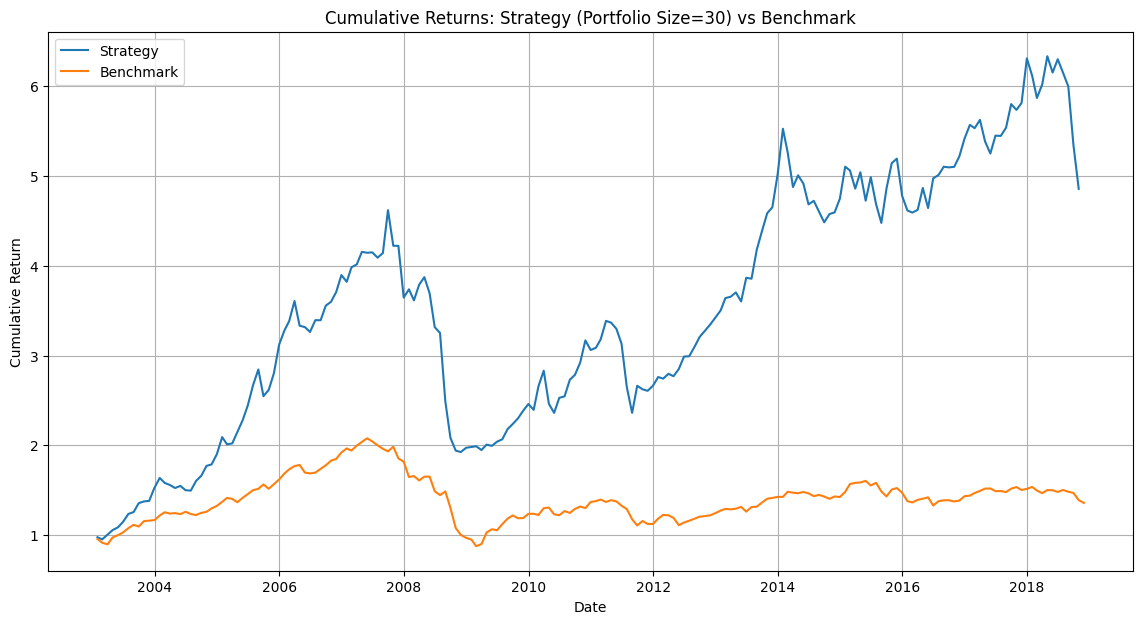

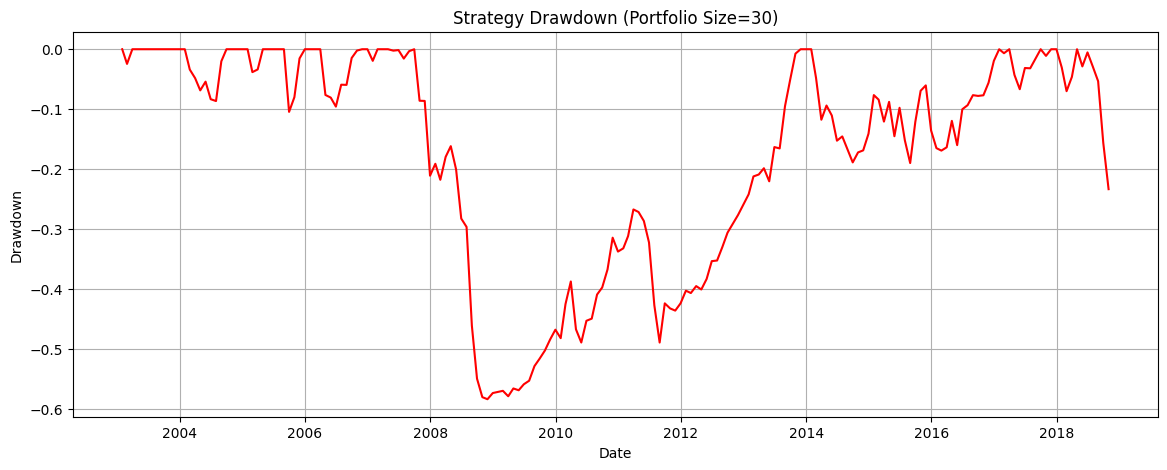

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

# --- New Parameter for Portfolio Size ---
# This is the new parameter we will change to test different portfolio sizes
initial_top_N_momentum = 50 # Start by selecting more stocks before skewness filter
final_portfolio_size = 30 # Target a larger final portfolio size

# Calculate cutoff for skewness filter based on desired final size
# If we want final_portfolio_size stocks, and we're dropping 30%, then we need final_portfolio_size / (1 - 0.3)
# roughly 14 stocks / (1 - 0.3) = 20 stocks for the original
# For 30 stocks: 30 / (1 - 0.3) = 30 / 0.7 = ~42.8 -> let's round up to 43 or just set top_N_momentum to a larger fixed number
# For simplicity, let's keep the *percentage* cutoff for skewness, but use a larger initial_top_N_momentum
# and ensure final_portfolio_size is enforced by taking 'head(final_portfolio_size)' after filtering.
skewness_drop_percent = 0.3 # Still dropping bottom 30% by skewness

# --- Portfolio Construction Loop (Modified) ---
strategy_returns = pd.DataFrame(index=monthly_returns.index[12:])

for date in strategy_returns.index:
    momentums = momentum_df.loc[date]
    skews = skewness_df.loc[date]

    valid_data = pd.concat([momentums, skews], axis=1).dropna()
    valid_data.columns = ['momentum', 'skew']

    # Step 1: Select top N by momentum (using new parameter)
    top_N_momentum_selected = valid_data.sort_values('momentum', ascending=False).head(initial_top_N_momentum)

    # Step 2: Drop bottom X% by skewness
    cutoff_count = int(len(top_N_momentum_selected) * skewness_drop_percent)
    skew_filtered_stocks = top_N_momentum_selected.sort_values('skew', ascending=False).iloc[:-cutoff_count]

    # Step 3: Enforce final portfolio size by taking the top 'final_portfolio_size' from the skewness-filtered list
    # This is important if initial_top_N_momentum * (1-skewness_drop_percent) is still > final_portfolio_size
    final_portfolio_selection = skew_filtered_stocks.head(final_portfolio_size)


    # Step 4: Get next month's return for these stocks
    try:
        next_month_idx = monthly_returns.index.get_loc(date) + 1
        # Ensure next_month_idx is within bounds
        if next_month_idx >= len(monthly_returns.index):
            continue # No next month returns available for the very last date

        next_month = monthly_returns.index[next_month_idx]
        returns_next_month = monthly_returns.loc[next_month, final_portfolio_selection.index]

        # Step 5: Equal-weight portfolio return (mean will ignore NaNs if a stock dropped out during the month)
        portfolio_return = returns_next_month.mean()
        strategy_returns.loc[date, 'strategy'] = portfolio_return
    except IndexError:
        continue # Last month; no next month returns available


# --- Benchmark and Performance Calculation (as per your notebook) ---
benchmark_returns = monthly_returns.mean(axis=1).loc[strategy_returns.index]
strategy_returns['benchmark'] = benchmark_returns

def performance_stats(returns, periods_per_year=12):
    returns = returns.dropna()
    if returns.empty:
        return {'CAGR': np.nan, 'Volatility': np.nan, 'Sharpe Ratio': np.nan, 'Max Drawdown': np.nan}
    
    cumulative = (1 + returns).cumprod()
    total_years = len(returns) / periods_per_year
    
    cagr = cumulative.iloc[-1] ** (1 / total_years) - 1 if total_years > 0 else np.nan
    vol = returns.std() * np.sqrt(periods_per_year)
    sharpe = cagr / vol if vol != 0 and not np.isnan(cagr) else np.nan
    
    roll_max = cumulative.cummax()
    drawdown = (cumulative - roll_max) / roll_max
    max_dd = drawdown.min()
    
    return {'CAGR': cagr, 'Volatility': vol, 'Sharpe Ratio': sharpe, 'Max Drawdown': max_dd}

strategy_stats = performance_stats(strategy_returns['strategy'])
benchmark_stats = performance_stats(strategy_returns['benchmark'])

print(f"\n--- Performance with Final Portfolio Size = {final_portfolio_size} ---")
print("Strategy Performance:")
for k, v in strategy_stats.items():
    print(f"{k}: {v:.2%}")

print("\nBenchmark Performance (same as before):")
for k, v in benchmark_stats.items():
    print(f"{k}: {v:.2%}")

# --- Plotting (as per your notebook) ---
strategy_cum = (1 + strategy_returns['strategy']).cumprod()
benchmark_cum = (1 + strategy_returns['benchmark']).cumprod()

plt.figure(figsize=(14,7))
plt.plot(strategy_cum, label='Strategy')
plt.plot(benchmark_cum, label='Benchmark')
plt.title(f'Cumulative Returns: Strategy (Portfolio Size={final_portfolio_size}) vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
drawdown_strategy = (strategy_cum / strategy_cum.cummax()) - 1
plt.plot(drawdown_strategy, color='red')
plt.title(f'Strategy Drawdown (Portfolio Size={final_portfolio_size})')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

Momentum shape with new parameters: (196, 1255)
Skewness shape with new parameters: (196, 1255)


,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2002-08-31,-0.024864,-0.74796,-0.251022,-0.122232,0.024632,0.093958,-0.008826,-0.012956,-0.669938,-0.008624,...,0.314472,0.0,0.0,-0.975939,0.0,0.0,-0.32329,0.0,-0.544249,0.0
2002-09-30,-0.126281,-0.479408,-0.335205,-0.10455,-0.099309,0.043742,-0.208444,-0.137411,-0.744185,-0.12578,...,0.109784,0.0,0.0,-0.87242,0.0,0.0,-0.478224,0.0,-0.814072,0.0
2002-10-31,-0.184868,-0.289549,-0.382227,-0.082227,-0.155722,-0.05855,-0.259853,-0.153616,-0.589987,-0.159734,...,0.011864,0.0,0.0,-0.283126,0.0,0.0,-0.265703,0.0,-0.903643,0.0
2002-11-30,-0.414761,-0.494103,-0.325282,-0.2609,-0.284298,-0.120338,-0.429252,-0.142861,-0.588612,-0.351145,...,-0.041951,0.0,0.0,-0.549335,0.0,0.0,-0.290888,0.0,-1.540666,0.0
2002-12-31,-0.378525,-0.097192,-0.330183,-0.151172,-0.189962,-0.189753,-0.297252,-0.192387,-0.046149,-0.195571,...,0.322912,0.0,0.0,-0.61381,0.0,0.0,0.025318,0.0,-1.182216,0.0


,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2002-08-31,-0.057527,1.092609,-1.610283,-0.906565,-0.328561,0.821148,-0.439392,-1.062697,-0.988124,-0.485701,...,-1.024956,NaN,NaN,-0.966704,NaN,NaN,-0.826927,NaN,1.248615,NaN
2002-09-30,0.55776,1.034636,-1.019987,-0.999446,-0.493566,0.302904,-0.779563,-0.534518,-0.621945,0.116245,...,-0.341682,NaN,NaN,-0.944994,NaN,NaN,-0.341472,NaN,0.157346,NaN
2002-10-31,0.970903,0.272412,-1.12059,-1.208045,-0.472579,-0.410123,-0.761737,-0.506757,-0.274464,0.35866,...,-0.296622,NaN,NaN,-1.444102,NaN,NaN,-0.124122,NaN,0.444145,NaN
2002-11-30,-0.553341,0.454503,-1.01214,-0.615131,-0.457467,0.112139,-0.450695,-0.535655,-0.276232,0.816065,...,-0.231897,NaN,NaN,-0.92107,NaN,NaN,-0.018686,NaN,-0.874955,NaN
2002-12-31,-0.866454,0.138977,-1.011034,-0.149135,-0.226015,-0.47235,-0.316156,-0.611748,0.602376,0.247959,...,0.219309,NaN,NaN,-0.845342,NaN,NaN,-0.148079,NaN,0.092787,NaN


,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-31,0.166618,-0.153868,0.177425,-0.015869,0.093477,-0.125015,0.0,-0.106333,0.158479,0.0,...,0.118196,0.129774,0.016656,0.257195,0.135702,0.037153,0.049653,0.065023,0.194347,0.0
2018-08-31,0.105498,-0.241212,0.150027,-0.071692,0.125655,-0.079976,0.0,-0.075533,0.235902,0.0,...,-0.095934,0.135972,0.004854,0.320347,0.061988,0.050357,-0.050446,0.277836,0.087536,0.0
2018-09-30,0.116049,-0.207131,0.161948,-0.046363,0.180497,-0.011688,0.0,0.003255,0.180945,0.0,...,-0.108539,0.10463,-0.017868,0.404834,0.185641,0.002679,0.044629,0.163545,0.190122,0.0
2018-10-31,0.131176,-0.224175,0.166864,-0.079772,0.137065,0.039939,0.0,0.102559,-0.001042,0.0,...,-0.009813,0.119807,0.071302,0.516025,0.241719,0.061219,0.245277,0.329778,0.425497,0.0
2018-11-30,0.191273,-0.181522,0.082085,-0.00885,0.191027,0.125185,0.0,0.115595,0.063074,0.0,...,-0.025674,0.222512,0.165494,0.325422,0.138385,0.006493,0.284447,0.214626,0.142765,0.0


,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-31,-0.185829,0.305872,-0.28012,0.350358,1.487545,0.649144,NaN,-0.886752,0.760012,NaN,...,-0.285656,-0.890744,0.319198,-1.422018,-0.81753,-1.403012,-0.067291,-1.033802,-1.221311,NaN
2018-08-31,0.282691,0.934158,0.020607,0.905149,1.61833,0.129705,NaN,-0.45262,0.842922,NaN,...,0.041551,-0.872126,0.367742,-0.80767,-0.117145,-1.429252,-0.347717,-1.026271,-0.815473,NaN
2018-09-30,0.250823,0.631428,-0.157814,0.618103,0.956608,0.957206,NaN,-0.495783,0.8213,NaN,...,-0.053337,-0.617474,0.133525,-0.010753,-0.481665,-0.745613,0.026555,-0.434277,-0.399772,NaN
2018-10-31,0.436938,0.477121,-0.076744,0.303167,0.826966,1.081774,NaN,-0.021937,0.552833,NaN,...,-0.660229,-0.854065,-0.430737,-0.032861,-1.255716,-0.384843,-0.483327,-0.09664,-0.712883,NaN
2018-11-30,-0.009639,0.172117,0.091111,-0.128122,0.542356,0.856998,NaN,0.269859,0.653486,NaN,...,-0.553038,0.024684,-0.348556,-0.488382,-0.504701,0.250924,-0.620603,0.417744,-0.161877,NaN



--- Performance with Momentum Lookback = 6 Months, Skip = 1 Month ---
Strategy Performance:
CAGR: 10.59%
Volatility: 19.15%
Sharpe Ratio: 55.31%
Max Drawdown: -62.98%

Benchmark Performance (adjusted for new strategy start date):
CAGR: 1.17%
Volatility: 13.04%
Sharpe Ratio: 8.95%
Max Drawdown: -57.85%


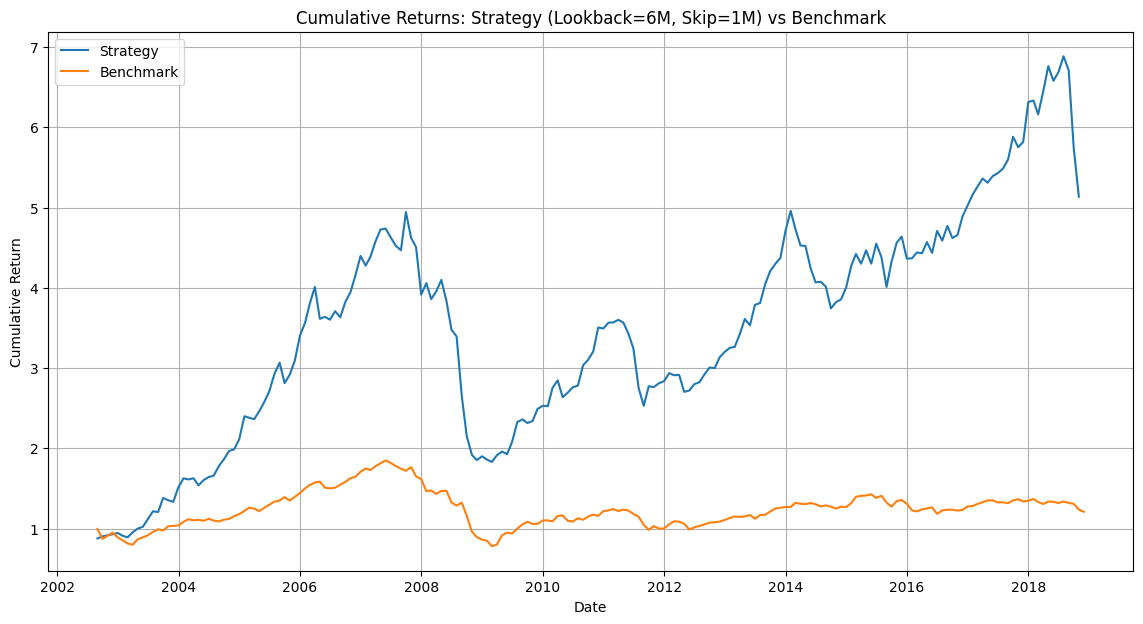

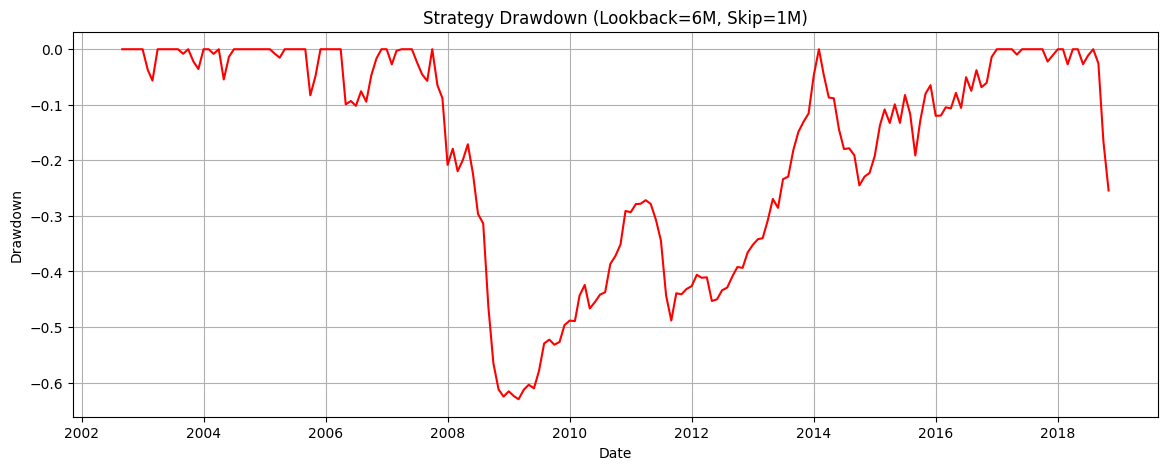

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt


# --- New Parameters for Momentum Calculation ---
momentum_lookback_months = 6  # Example: Try 6 months instead of 12
momentum_skip_months = 1    # Keep 1 month skip for now

# --- Re-calculate Momentum and Skewness DataFrames with new parameters ---
# (This part is essentially a modified version of your notebook's Step 2/monthly momentum and skewness calculation)

# Initialize momentum and skewness DataFrames
momentum_df_new = pd.DataFrame(index=monthly_returns.index, columns=monthly_returns.columns)
skewness_df_new = pd.DataFrame(index=monthly_returns.index, columns=monthly_returns.columns)

# Loop to compute rolling metrics with new windows
# The loop starts after enough months for the lookback + skip.
# len(monthly_returns) is the total number of monthly periods.
# We need `momentum_lookback_months` of data + `momentum_skip_months` to be able to calculate momentum.
# The calculation for date `i` uses data from `i - momentum_lookback_months - momentum_skip_months` up to `i - momentum_skip_months - 1`.
# So, the first valid index `i` will be `momentum_lookback_months + momentum_skip_months`.

for i in range(momentum_lookback_months + momentum_skip_months, len(monthly_returns)):
    # Slice for momentum window: from `i - lookback - skip` up to `i - skip - 1`
    window_start_idx = i - momentum_lookback_months - momentum_skip_months
    window_end_idx = i - momentum_skip_months
    
    # Ensure window_start_idx is not negative (handles very early periods where not enough data)
    # Using `max(0, window_start_idx)` ensures we don't go out of bounds on the left.
    # However, rolling sum/skew will naturally handle cases with too few data points by returning NaN.
    
    # Get the actual returns for the lookback period, excluding the skip period
    lookback_period_returns = monthly_returns.iloc[window_start_idx : window_end_idx]
    
    # Ensure there are enough non-NaN periods for a meaningful calculation
    # We define 'enough' as at least 75% of the lookback window, similar to previous steps.
    min_periods_for_calc = int(momentum_lookback_months * 0.75)

    for col in monthly_returns.columns:
        if lookback_period_returns[col].dropna().count() >= min_periods_for_calc:
            # Momentum is sum of log returns
            momentum_df_new.loc[monthly_returns.index[i], col] = lookback_period_returns[col].sum()
            
            # Skewness is skew of log returns
            # Ensure skew calculation has at least 3 points (min requirement for skew)
            if lookback_period_returns[col].dropna().count() >= 3:
                skewness_df_new.loc[monthly_returns.index[i], col] = skew(lookback_period_returns[col].dropna())

# Drop initial rows with all NaNs from the newly calculated momentum_df_new and skewness_df_new
momentum_df_new = momentum_df_new.dropna(how='all')
skewness_df_new = skewness_df_new.dropna(how='all')

print(f"Momentum shape with new parameters: {momentum_df_new.shape}")
print(f"Skewness shape with new parameters: {skewness_df_new.shape}")
display(momentum_df_new.head())
display(skewness_df_new.head())
display(momentum_df_new.tail())
display(skewness_df_new.tail())


# --- Portfolio Construction Loop (using the new momentum_df_new and skewness_df_new) ---
# Keep the portfolio size parameters from the previous successful run (final_portfolio_size = 30)
# Make sure initial_top_N_momentum and skewness_drop_percent are also defined from prior step.
# For simplicity, if not defined in your current session, let's re-define them here:
# initial_top_N_momentum = 50
# final_portfolio_size = 30
# skewness_drop_percent = 0.3 # Still dropping bottom 30% by skewness

strategy_returns_new_params = pd.DataFrame(index=momentum_df_new.index) # Use the index of the NEW momentum_df

for date in strategy_returns_new_params.index:
    momentums = momentum_df_new.loc[date] # Use the new momentum_df
    skews = skewness_df_new.loc[date]     # Use the new skewness_df

    valid_data = pd.concat([momentums, skews], axis=1).dropna()
    valid_data.columns = ['momentum', 'skew']

    if len(valid_data) < final_portfolio_size: # Ensure enough stocks to even attempt selection
        # print(f"Not enough valid stocks for {date}. Skipping.") # Optional: uncomment for more verbose logging
        continue

    # Step 1: Select top N by momentum
    top_N_momentum_selected = valid_data.sort_values('momentum', ascending=False).head(initial_top_N_momentum)

    # Step 2: Drop bottom X% by skewness
    cutoff_count = int(len(top_N_momentum_selected) * skewness_drop_percent)
    if cutoff_count >= len(top_N_momentum_selected): # Handle edge case where cutoff removes all
        cutoff_count = len(top_N_momentum_selected) - 1 # Ensure at least one stock remains, or handle empty list later
    
    top_skew_filtered = top_N_momentum_selected.sort_values('skew', ascending=False).iloc[:-cutoff_count]

    # Step 3: Enforce final portfolio size
    final_portfolio_selection = top_skew_filtered.head(final_portfolio_size)
    
    if final_portfolio_selection.empty: # If no stocks remained after filtering
        # print(f"No stocks selected for portfolio on {date}. Skipping.") # Optional: uncomment for more verbose logging
        continue


    # Step 4: Get next month's return for these stocks
    try:
        current_month_idx = monthly_returns.index.get_loc(date)
        next_month_idx = current_month_idx + 1

        if next_month_idx >= len(monthly_returns.index):
            continue # No next month returns available for the very last date

        next_month = monthly_returns.index[next_month_idx]
        returns_next_month = monthly_returns.loc[next_month, final_portfolio_selection.index]

        # Step 5: Equal-weight portfolio return (mean will ignore NaNs)
        portfolio_return = returns_next_month.mean()
        strategy_returns_new_params.loc[date, 'strategy'] = portfolio_return
    except IndexError:
        continue # Last month; no next month returns available

# --- Benchmark and Performance Calculation ---
benchmark_returns_new_params = monthly_returns.mean(axis=1).loc[strategy_returns_new_params.index]
strategy_returns_new_params['benchmark'] = benchmark_returns_new_params

# Use the performance_stats function defined in your notebook
strategy_stats_new = performance_stats(strategy_returns_new_params['strategy'])
benchmark_stats_new = performance_stats(strategy_returns_new_params['benchmark'])

print(f"\n--- Performance with Momentum Lookback = {momentum_lookback_months} Months, Skip = {momentum_skip_months} Month ---")
print("Strategy Performance:")
for k, v in strategy_stats_new.items():
    print(f"{k}: {v:.2%}")

print("\nBenchmark Performance (adjusted for new strategy start date):")
for k, v in benchmark_stats_new.items():
    print(f"{k}: {v:.2%}")

# --- Plotting ---
strategy_cum_new = (1 + strategy_returns_new_params['strategy']).cumprod()
benchmark_cum_new = (1 + strategy_returns_new_params['benchmark']).cumprod()

plt.figure(figsize=(14,7))
plt.plot(strategy_cum_new, label='Strategy')
plt.plot(benchmark_cum_new, label='Benchmark')
plt.title(f'Cumulative Returns: Strategy (Lookback={momentum_lookback_months}M, Skip={momentum_skip_months}M) vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
drawdown_strategy_new = (strategy_cum_new / strategy_cum_new.cummax()) - 1
plt.plot(drawdown_strategy_new, color='red')
plt.title(f'Strategy Drawdown (Lookback={momentum_lookback_months}M, Skip={momentum_skip_months}M)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

Momentum shape with new skip: (197, 1255)
Skewness shape with new skip: (197, 1255)

--- Performance with Momentum Lookback = 6 Months, Skip = 0 Month ---
Strategy Performance:
CAGR: 13.31%
Volatility: 18.45%
Sharpe Ratio: 72.12%
Max Drawdown: -56.32%

Benchmark Performance (adjusted for new strategy start date):
CAGR: 0.60%
Volatility: 13.19%
Sharpe Ratio: 4.57%
Max Drawdown: -57.85%


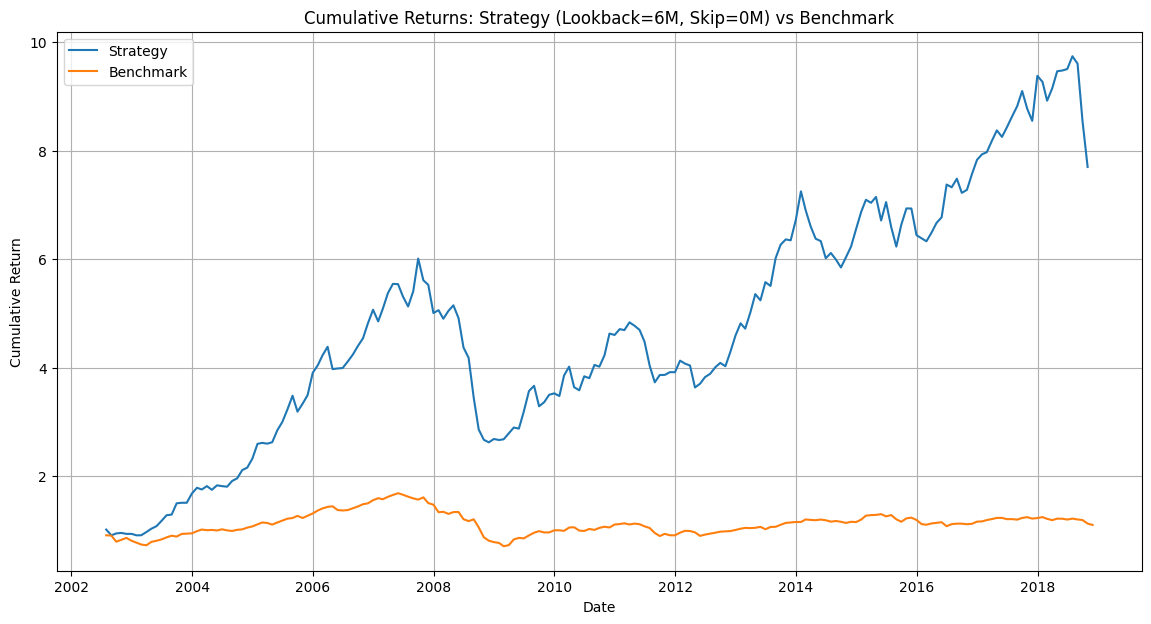

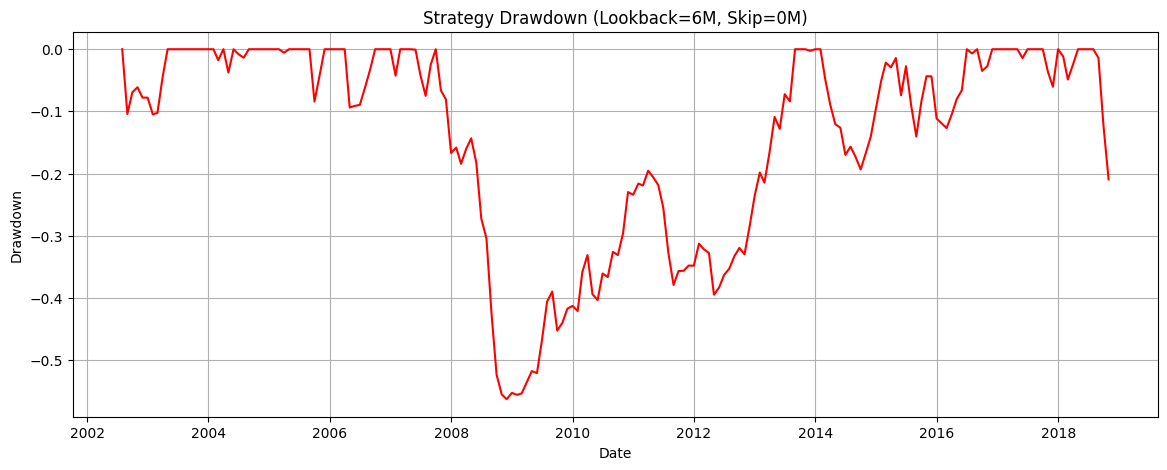

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

# --- Ensure df_prices and monthly_returns are already defined ---

# --- New Parameters for Momentum Calculation ---
momentum_lookback_months = 6  # Keeping 6 months lookback
momentum_skip_months = 0    # NEW: No skip (using the most recent month's data)

# --- Re-calculate Momentum and Skewness DataFrames with new parameters ---
momentum_df_new_skip = pd.DataFrame(index=monthly_returns.index, columns=monthly_returns.columns)
skewness_df_new_skip = pd.DataFrame(index=monthly_returns.index, columns=monthly_returns.columns)

for i in range(momentum_lookback_months + momentum_skip_months, len(monthly_returns)):
    window_start_idx = i - momentum_lookback_months - momentum_skip_months
    window_end_idx = i - momentum_skip_months
    
    lookback_period_returns = monthly_returns.iloc[window_start_idx : window_end_idx]
    
    min_periods_for_calc = int(momentum_lookback_months * 0.75)

    for col in monthly_returns.columns:
        if lookback_period_returns[col].dropna().count() >= min_periods_for_calc:
            momentum_df_new_skip.loc[monthly_returns.index[i], col] = lookback_period_returns[col].sum()
            if lookback_period_returns[col].dropna().count() >= 3:
                skewness_df_new_skip.loc[monthly_returns.index[i], col] = skew(lookback_period_returns[col].dropna())

momentum_df_new_skip = momentum_df_new_skip.dropna(how='all')
skewness_df_new_skip = skewness_df_new_skip.dropna(how='all')

print(f"Momentum shape with new skip: {momentum_df_new_skip.shape}")
print(f"Skewness shape with new skip: {skewness_df_new_skip.shape}")
# display(momentum_df_new_skip.head()) # Uncomment for verbose display
# display(skewness_df_new_skip.head()) # Uncomment for verbose display


# --- Portfolio Construction Loop (using the new momentum_df_new_skip and skewness_df_new_skip) ---
# Keep the portfolio size parameters (final_portfolio_size = 30, initial_top_N_momentum = 50, skewness_drop_percent = 0.3)
# For simplicity, if not defined in your current session, let's re-define them here:
initial_top_N_momentum = 50
final_portfolio_size = 30
skewness_drop_percent = 0.3

strategy_returns_new_skip = pd.DataFrame(index=momentum_df_new_skip.index) # Use the index of the NEW momentum_df

for date in strategy_returns_new_skip.index:
    momentums = momentum_df_new_skip.loc[date] # Use the new momentum_df_new_skip
    skews = skewness_df_new_skip.loc[date]     # Use the new skewness_df_new_skip

    valid_data = pd.concat([momentums, skews], axis=1).dropna()
    valid_data.columns = ['momentum', 'skew']

    if len(valid_data) < final_portfolio_size:
        continue

    top_N_momentum_selected = valid_data.sort_values('momentum', ascending=False).head(initial_top_N_momentum)

    cutoff_count = int(len(top_N_momentum_selected) * skewness_drop_percent)
    if cutoff_count >= len(top_N_momentum_selected):
        cutoff_count = len(top_N_momentum_selected) - 1
    
    top_skew_filtered = top_N_momentum_selected.sort_values('skew', ascending=False).iloc[:-cutoff_count]

    final_portfolio_selection = top_skew_filtered.head(final_portfolio_size)
    
    if final_portfolio_selection.empty:
        continue

    try:
        current_month_idx = monthly_returns.index.get_loc(date)
        next_month_idx = current_month_idx + 1

        if next_month_idx >= len(monthly_returns.index):
            continue

        next_month = monthly_returns.index[next_month_idx]
        returns_next_month = monthly_returns.loc[next_month, final_portfolio_selection.index]

        portfolio_return = returns_next_month.mean()
        strategy_returns_new_skip.loc[date, 'strategy'] = portfolio_return
    except IndexError:
        continue

# --- Benchmark and Performance Calculation ---
benchmark_returns_new_skip = monthly_returns.mean(axis=1).loc[strategy_returns_new_skip.index]
strategy_returns_new_skip['benchmark'] = benchmark_returns_new_skip

strategy_stats_new_skip = performance_stats(strategy_returns_new_skip['strategy'])
benchmark_stats_new_skip = performance_stats(strategy_returns_new_skip['benchmark'])

print(f"\n--- Performance with Momentum Lookback = {momentum_lookback_months} Months, Skip = {momentum_skip_months} Month ---")
print("Strategy Performance:")
for k, v in strategy_stats_new_skip.items():
    print(f"{k}: {v:.2%}")

print("\nBenchmark Performance (adjusted for new strategy start date):")
for k, v in benchmark_stats_new_skip.items():
    print(f"{k}: {v:.2%}")

# --- Plotting ---
strategy_cum_new_skip = (1 + strategy_returns_new_skip['strategy']).cumprod()
benchmark_cum_new_skip = (1 + strategy_returns_new_skip['benchmark']).cumprod()

plt.figure(figsize=(14,7))
plt.plot(strategy_cum_new_skip, label='Strategy')
plt.plot(benchmark_cum_new_skip, label='Benchmark')
plt.title(f'Cumulative Returns: Strategy (Lookback={momentum_lookback_months}M, Skip={momentum_skip_months}M) vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
drawdown_strategy_new_skip = (strategy_cum_new_skip / strategy_cum_new_skip.cummax()) - 1
plt.plot(drawdown_strategy_new_skip, color='red')
plt.title(f'Strategy Drawdown (Lookback={momentum_lookback_months}M, Skip={momentum_skip_months}M)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

Momentum shape (recalculated for current parameters): (196, 1255)
Skewness shape (recalculated for current parameters): (196, 1255)

--- Portfolio Holdings at Each Rebalance (First few periods) ---
  2002-08-31: Selected 25 stocks:
    ['Bourbon Corp', 'Sartorius Stedim Biotech', 'Kuehne + Nagel International AG', 'Kuehne + Nagel International AG.1', 'ArcelorMittal', 'ProSiebenSat.1 Media SE', 'YIT OYJ', 'Micronas Semiconductor Holding AG', 'Nobel Biocare Holding AG', 'Nobel Biocare Holding AG.1', 'Iberia Lineas Aereas de Espana SA Operad', 'Meda AB', 'Imperial Brands PLC', 'SEB SA', 'Valora Holding AG', 'FLSmidth & Co A/S', 'Metsa Board OYJ', 'Saipem SpA', 'SGS SA', 'SGS SA.1', 'Hexagon AB', 'Eiffage SA', 'Remy Cointreau SA', 'Zimmer Schweiz Holdings GmbH', 'Etablissements Maurel et Prom']
  2002-09-30: Selected 25 stocks:
    ['D/S Norden A/S', 'Intrum AB', 'Johnston Press PLC', 'Gates Worldwide Ltd', 'Geberit AG', 'Geberit AG.1', 'Bourbon Corp', 'Iberia Lineas Aereas de Espana SA Op

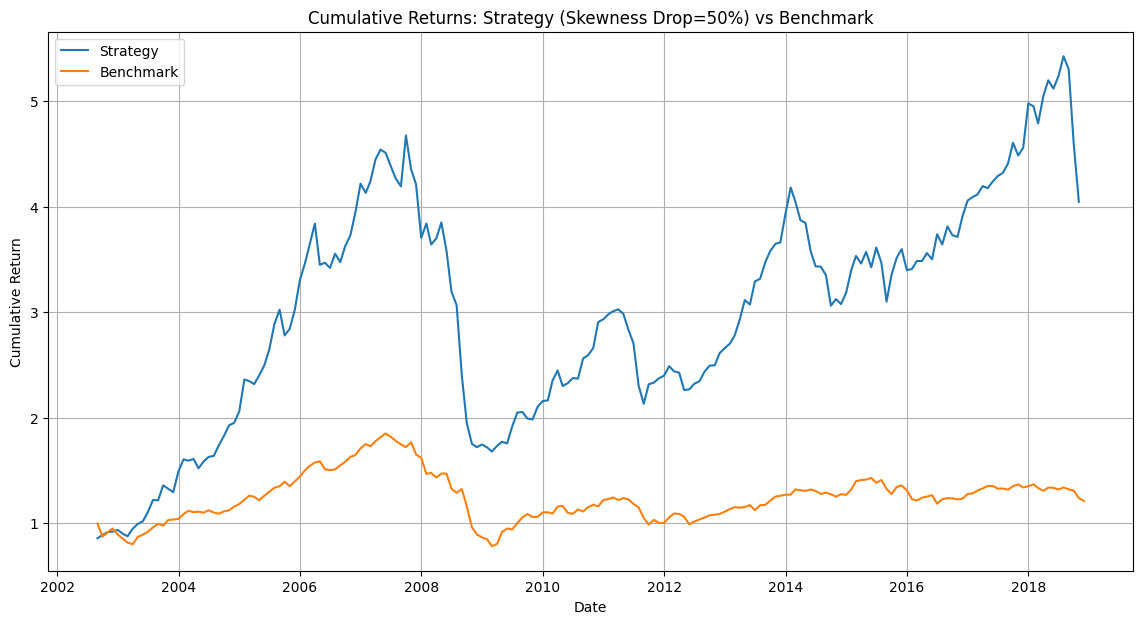

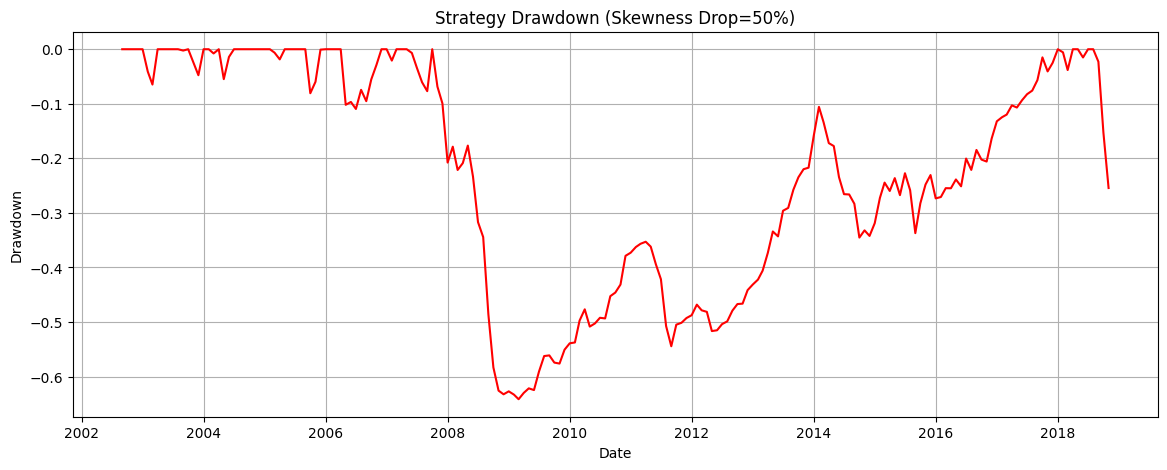

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

# --- ASSUMPTION: df_prices and monthly_returns are already loaded and pre-calculated
#    from the very first steps of your Jupyter notebook.
#    If not, you MUST copy/paste those initial data loading and monthly_returns calculation cells here first.
#    For example:
#    file_path = '/Users/alesarabandi/Downloads/Fin_Market/SPX500 Original.xlsm'
#    df_prices = pd.read_excel(file_path, sheet_name='Price daily', header=1)
#    df_prices.rename(columns={df_prices.columns[0]: 'Date'}, inplace=True)
#    df_prices['Date'] = pd.to_datetime(df_prices['Date'])
#    df_prices.set_index('Date', inplace=True)
#    df_prices = df_prices.apply(pd.to_numeric, errors='coerce')
#    df_prices.dropna(axis=1, how='all', inplace=True)
#    df_returns = np.log(df_prices / df_prices.shift(1))
#    monthly_returns = df_returns.resample('M').sum()


# --- Best Momentum Parameters (from previous best step: 6M Lookback, 1M Skip) ---
momentum_lookback_months = 6
momentum_skip_months = 1

# --- Best Skewness Threshold ---
skewness_drop_percent = 0.5 # Drop bottom 50% by skewness (i.e., keep top 40%)

# --- Best Portfolio Size Parameters ---
initial_top_N_momentum = 50 # Initial selection before skewness filter
final_portfolio_size = 30   # Target final portfolio size


# --- RE-CALCULATE Momentum and Skewness DataFrames with the chosen momentum parameters ---
# This ensures consistency and makes this block self-contained.
momentum_df = pd.DataFrame(index=monthly_returns.index, columns=monthly_returns.columns)
skewness_df = pd.DataFrame(index=monthly_returns.index, columns=monthly_returns.columns)

for i in range(momentum_lookback_months + momentum_skip_months, len(monthly_returns)):
    window_start_idx = i - momentum_lookback_months - momentum_skip_months
    window_end_idx = i - momentum_skip_months
    
    lookback_period_returns = monthly_returns.iloc[window_start_idx : window_end_idx]
    min_periods_for_calc = int(momentum_lookback_months * 0.75)

    for col in monthly_returns.columns:
        if lookback_period_returns[col].dropna().count() >= min_periods_for_calc:
            momentum_df.loc[monthly_returns.index[i], col] = lookback_period_returns[col].sum()
            if lookback_period_returns[col].dropna().count() >= 3:
                skewness_df.loc[monthly_returns.index[i], col] = skew(lookback_period_returns[col].dropna())

momentum_df = momentum_df.dropna(how='all')
skewness_df = skewness_df.dropna(how='all')

print(f"Momentum shape (recalculated for current parameters): {momentum_df.shape}")
print(f"Skewness shape (recalculated for current parameters): {skewness_df.shape}")


# --- Portfolio Construction Loop (with added print for holdings) ---
strategy_returns_current_run = pd.DataFrame(index=momentum_df.index)

# New variable to control how many dates to print holdings for
max_print_dates = 10 
dates_printed_count = 0

print("\n--- Portfolio Holdings at Each Rebalance (First few periods) ---")

for date in strategy_returns_current_run.index:
    momentums = momentum_df.loc[date]
    skews = skewness_df.loc[date]

    valid_data = pd.concat([momentums, skews], axis=1).dropna()
    valid_data.columns = ['momentum', 'skew']

    if len(valid_data) < final_portfolio_size:
        if dates_printed_count < max_print_dates: # Only print if we are in the initial print range
             print(f"  {date.strftime('%Y-%m-%d')}: Not enough valid stocks ({len(valid_data)}) to form portfolio. Skipping.")
        continue

    # Step 1: Select top N by momentum
    top_N_momentum_selected = valid_data.sort_values('momentum', ascending=False).head(initial_top_N_momentum)

    # Step 2: Drop bottom X% by skewness
    cutoff_count = int(len(top_N_momentum_selected) * skewness_drop_percent)
    if cutoff_count >= len(top_N_momentum_selected):
        cutoff_count = len(top_N_momentum_selected) - final_portfolio_size
        if cutoff_count < 0:
            cutoff_count = 0

    top_skew_filtered = top_N_momentum_selected.sort_values('skew', ascending=False).iloc[:-cutoff_count]

    # Step 3: Enforce final portfolio size
    final_portfolio_selection = top_skew_filtered.head(final_portfolio_size)
    
    if final_portfolio_selection.empty:
        if dates_printed_count < max_print_dates: # Only print if we are in the initial print range
            print(f"  {date.strftime('%Y-%m-%d')}: No stocks selected after filtering. Skipping.")
        continue

    # --- ADDED: Print selected tickers for the first few dates ---
    if dates_printed_count < max_print_dates:
        print(f"  {date.strftime('%Y-%m-%d')}: Selected {len(final_portfolio_selection)} stocks:")
        print(f"    {final_portfolio_selection.index.tolist()}")
        dates_printed_count += 1 # Increment counter only when stocks are successfully selected

    try:
        current_month_idx = monthly_returns.index.get_loc(date)
        next_month_idx = current_month_idx + 1

        if next_month_idx >= len(monthly_returns.index):
            continue

        next_month = monthly_returns.index[next_month_idx]
        returns_next_month = monthly_returns.loc[next_month, final_portfolio_selection.index]

        portfolio_return = returns_next_month.mean()
        strategy_returns_current_run.loc[date, 'strategy'] = portfolio_return
    except IndexError:
        continue

# --- Benchmark and Performance Calculation (unchanged) ---
benchmark_returns_current_run = monthly_returns.mean(axis=1).loc[strategy_returns_current_run.index]
strategy_returns_current_run['benchmark'] = benchmark_returns_current_run

# Define the performance_stats function (ensure it's the CORRECTED version)
def performance_stats(returns, periods_per_year=12):
    returns = returns.dropna()
    if returns.empty:
        return {'CAGR': np.nan, 'Volatility': np.nan, 'Sharpe Ratio': np.nan, 'Max Drawdown': np.nan}
    
    cumulative = (1 + returns).cumprod()
    total_years = len(returns) / periods_per_year 
    
    cagr = cumulative.iloc[-1] ** (1 / total_years) - 1 if total_years > 0 else np.nan
    vol = returns.std() * np.sqrt(periods_per_year)
    
    sharpe = cagr / vol if vol != 0 and not np.isnan(cagr) else np.nan
    
    roll_max = cumulative.cummax()
    drawdown = (cumulative - roll_max) / roll_max
    max_dd = drawdown.min()
    
    return {'CAGR': cagr, 'Volatility': vol, 'Sharpe Ratio': sharpe, 'Max Drawdown': max_dd}

strategy_stats_current_run = performance_stats(strategy_returns_current_run['strategy'])
benchmark_stats_current_run = performance_stats(strategy_returns_current_run['benchmark'])

print(f"\n--- Confirmed Performance with Skewness Drop Percent = {skewness_drop_percent*100:.0f}% (Lookback=6M, Skip=1M, PortSize=30) ---")
print("Strategy Performance:")
for k, v in strategy_stats_current_run.items():
    print(f"{k}: {v:.2%}")

print("\nBenchmark Performance (adjusted for new strategy start date):")
for k, v in benchmark_stats_current_run.items():
    print(f"{k}: {v:.2%}")

# --- Plotting (unchanged) ---
strategy_cum_current_run = (1 + strategy_returns_current_run['strategy']).cumprod()
benchmark_cum_current_run = (1 + strategy_returns_current_run['benchmark']).cumprod()

plt.figure(figsize=(14,7))
plt.plot(strategy_cum_current_run, label='Strategy')
plt.plot(benchmark_cum_current_run, label='Benchmark')
plt.title(f'Cumulative Returns: Strategy (Skewness Drop={skewness_drop_percent*100:.0f}%) vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
drawdown_strategy_current_run = (strategy_cum_current_run / strategy_cum_current_run.cummax()) - 1
plt.plot(drawdown_strategy_current_run, color='red')
plt.title(f'Strategy Drawdown (Skewness Drop={skewness_drop_percent*100:.0f}%)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()